In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import*
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
from keras.layers import Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Dropout
from keras.regularizers import L1L2


# Read Data Month Wise

In [31]:



#Cloud  months
cloud_JuneToJuly = pd.read_csv('data/Cloud/from_20210622_130000_to_20210721_130000_cloud.csv')
cloud_JulyToAug = pd.read_csv('data/Cloud/from_20210720_130000_to_20210818_130000_cloud.csv')
cloud_AugToSep = pd.read_csv('data/Cloud/from_20210817_130000_to_20210915_130000_cloud.csv')
cloud_SepToOct = pd.read_csv('data/Cloud/from_20210914_130000_to_20211013_130000_cloud.csv')
cloud_OctToNov = pd.read_csv('data/Cloud/from_20211012_130000_to_20211110_130000_cloud.csv')
cloud_NovToDec = pd.read_csv('data/Cloud/from_20211109_130000_to_20211208_130000_cloud.csv')


# Irriadance 

irradiance_JuneToJuly = pd.read_csv('data/Irradiance/from_20210622_130000_to_20210721_130000_irradiance.csv')
irradiance_JulyToAug = pd.read_csv('data/Irradiance/from_20210720_130000_to_20210818_130000_irradiance.csv')
irradiance_AugToSep = pd.read_csv('data/Irradiance/from_20210817_130000_to_20210915_130000_irradiance.csv')
irradiance_SepToOct = pd.read_csv('data/Irradiance/from_20210914_130000_to_20211013_130000_irradiance.csv')
irradiance_OctToNov = pd.read_csv('data/Irradiance/from_20211012_130000_to_20211110_130000_irradiance.csv')
irradiance_NovToDec = pd.read_csv('data/Irradiance/from_20211109_130000_to_20211208_130000_irradiance.csv')


# PV 

power_JuneToJuly = pd.read_csv('data/PV_power_west/from_20210622_130000_to_20210721_130000_PV_power_west.csv')
power_JulyToAug = pd.read_csv('data/PV_power_west/from_20210720_130000_to_20210818_130000_PV_power_west.csv')
power_AugToSep = pd.read_csv('data/PV_power_west/from_20210817_130000_to_20210915_130000_PV_power_west.csv')
power_SepToOct = pd.read_csv('data/PV_power_west/from_20210914_130000_to_20211013_130000_PV_power_west.csv')
power_OctToNov = pd.read_csv('data/PV_power_west/from_20211012_130000_to_20211110_130000_PV_power_west.csv')
power_NovToDec = pd.read_csv('data/PV_power_west/from_20211109_130000_to_20211208_130000_PV_power_west.csv')

# Rain

rain_JuneToJuly = pd.read_csv('data/rain/from_20210622_130000_to_20210721_130000_rain.csv')
rain_JulyToAug = pd.read_csv('data/rain/from_20210720_130000_to_20210818_130000_rain.csv')
rain_AugToSep = pd.read_csv('data/rain/from_20210817_130000_to_20210915_130000_rain.csv')
rain_SepToOct = pd.read_csv('data/rain/from_20210914_130000_to_20211013_130000_rain.csv')
rain_OctToNov = pd.read_csv('data/rain/from_20211012_130000_to_20211110_130000_rain.csv')
rain_NovToDec = pd.read_csv('data/rain/from_20211109_130000_to_20211208_130000_rain.csv')

# Temperature 

temp_JuneToJuly = pd.read_csv('data/Temperature/from_20210622_130000_to_20210721_130000_temp.csv')
temp_JulyToAug = pd.read_csv('data/Temperature/from_20210720_130000_to_20210818_130000_temp.csv')
temp_AugToSep = pd.read_csv('data/Temperature/from_20210817_130000_to_20210915_130000_temp.csv')
temp_SepToOct = pd.read_csv('data/Temperature/from_20210914_130000_to_20211013_130000_temp.csv')
temp_OctToNov = pd.read_csv('data/Temperature/from_20211012_130000_to_20211110_130000_temp.csv')
temp_NovToDec = pd.read_csv('data/Temperature/from_20211109_130000_to_20211208_130000_temp.csv')

# Voltage_current 

vc_JuneToJuly = pd.read_csv('data/Voltage_current/from_20210622_130000_to_20210721_130000_voltage_current.csv')
vc_JulyToAug = pd.read_csv('data/Voltage_current/from_20210720_130000_to_20210818_130000_voltage_current.csv')
vc_AugToSep = pd.read_csv('data/Voltage_current/from_20210817_130000_to_20210915_130000_voltage_current.csv')
vc_SepToOct = pd.read_csv('data/Voltage_current/from_20210914_130000_to_20211013_130000_voltage_current.csv')
vc_OctToNov = pd.read_csv('data/Voltage_current/from_20211012_130000_to_20211110_130000_voltage_current.csv')
vc_NovToDec = pd.read_csv('data/Voltage_current/from_20211109_130000_to_20211208_130000_voltage_current.csv')





# Function to convert Epoch time to Datetime

In [32]:
def epoch_to_date(data_frame):
    data_frame["Date"] = data_frame["# time"].apply(lambda x:datetime.datetime.fromtimestamp(x/1000))
    data_frame.drop(columns=["# time"], inplace=True)
    return data_frame

In [33]:
# # For June to July
cloud_JuneToJuly=epoch_to_date(cloud_JuneToJuly)
irradiance_JuneToJuly=epoch_to_date(irradiance_JuneToJuly)
power_JuneToJuly=epoch_to_date(power_JuneToJuly)
rain_JuneToJuly=epoch_to_date(rain_JuneToJuly)
temp_JuneToJuly=epoch_to_date(temp_JuneToJuly)
vc_JuneToJuly=epoch_to_date(vc_JuneToJuly)
cloud_JuneToJuly.set_index(['Date'], inplace=True) 
irradiance_JuneToJuly.set_index(["Date"], inplace=True) 
power_JuneToJuly.set_index(['Date'], inplace=True) 
rain_JuneToJuly.set_index(["Date"], inplace=True) 
temp_JuneToJuly.set_index(['Date'], inplace=True) 
vc_JuneToJuly.set_index(["Date"], inplace=True) 
JuneToJuly = pd.concat([cloud_JuneToJuly, irradiance_JuneToJuly,power_JuneToJuly,rain_JuneToJuly,temp_JuneToJuly,vc_JuneToJuly], axis=1)
i2keep = set(cloud_JuneToJuly.index.tolist()) and set(irradiance_JuneToJuly.index.tolist()) and set(power_JuneToJuly.index.tolist()) and set(rain_JuneToJuly.index.tolist()) and set(temp_JuneToJuly.index.tolist()) and set(vc_JuneToJuly.index.tolist()) 
JuneToJuly=JuneToJuly.loc[i2keep,:].reset_index()

# # For July to Aug
cloud_JulyToAug=epoch_to_date(cloud_JulyToAug)
irradiance_JulyToAug=epoch_to_date(irradiance_JulyToAug)
power_JulyToAug=epoch_to_date(power_JulyToAug)
rain_JulyToAug=epoch_to_date(rain_JulyToAug)
temp_JulyToAug=epoch_to_date(temp_JulyToAug)
vc_JulyToAug=epoch_to_date(vc_JulyToAug)
cloud_JulyToAug.set_index(['Date'], inplace=True) 
irradiance_JulyToAug.set_index(["Date"], inplace=True) 
power_JulyToAug.set_index(['Date'], inplace=True) 
rain_JulyToAug.set_index(["Date"], inplace=True) 
temp_JulyToAug.set_index(['Date'], inplace=True) 
vc_JulyToAug.set_index(["Date"], inplace=True) 
JulyToAug = pd.concat([cloud_JulyToAug, irradiance_JulyToAug,power_JulyToAug,rain_JulyToAug,temp_JulyToAug,vc_JulyToAug], axis=1)
i2keep = set(cloud_JulyToAug.index.tolist()) and set(irradiance_JulyToAug.index.tolist()) and set(power_JulyToAug.index.tolist()) and set(rain_JulyToAug.index.tolist()) and set(temp_JulyToAug.index.tolist()) and set(vc_JulyToAug.index.tolist()) 
JulyToAug=JulyToAug.loc[i2keep,:].reset_index()

# # Aug To Sep
cloud_AugToSep=epoch_to_date(cloud_AugToSep)
irradiance_AugToSep=epoch_to_date(irradiance_AugToSep)
power_AugToSep=epoch_to_date(power_AugToSep)
rain_AugToSep=epoch_to_date(rain_AugToSep)
temp_AugToSep=epoch_to_date(temp_AugToSep)
vc_AugToSep=epoch_to_date(vc_AugToSep)
cloud_AugToSep.set_index(['Date'], inplace=True) 
irradiance_AugToSep.set_index(["Date"], inplace=True) 
power_AugToSep.set_index(['Date'], inplace=True) 
rain_AugToSep.set_index(["Date"], inplace=True) 
temp_AugToSep.set_index(['Date'], inplace=True) 
vc_AugToSep.set_index(["Date"], inplace=True) 
AugToSep = pd.concat([cloud_AugToSep, irradiance_AugToSep,power_AugToSep,rain_AugToSep,temp_AugToSep,vc_AugToSep], axis=1)
i2keep = set(cloud_AugToSep.index.tolist()) and set(irradiance_AugToSep.index.tolist()) and set(power_AugToSep.index.tolist()) and set(rain_AugToSep.index.tolist()) and set(temp_AugToSep.index.tolist()) and set(vc_AugToSep.index.tolist()) 
AugToSep=AugToSep.loc[i2keep,:].reset_index()

# # For Sep to Oct
cloud_SepToOct=epoch_to_date(cloud_SepToOct)
irradiance_SepToOct=epoch_to_date(irradiance_SepToOct)
power_SepToOct=epoch_to_date(power_SepToOct)
rain_SepToOct=epoch_to_date(rain_SepToOct)
temp_SepToOct=epoch_to_date(temp_SepToOct)
vc_SepToOct=epoch_to_date(vc_SepToOct)
cloud_SepToOct.set_index(['Date'], inplace=True) 
irradiance_SepToOct.set_index(["Date"], inplace=True) 
power_SepToOct.set_index(['Date'], inplace=True) 
rain_SepToOct.set_index(["Date"], inplace=True) 
temp_SepToOct.set_index(['Date'], inplace=True) 
vc_SepToOct.set_index(["Date"], inplace=True) 
SepToOct = pd.concat([cloud_SepToOct, irradiance_SepToOct,power_SepToOct,rain_SepToOct,temp_SepToOct,vc_SepToOct], axis=1)
i2keep = set(cloud_SepToOct.index.tolist()) and set(irradiance_SepToOct.index.tolist()) and set(power_SepToOct.index.tolist()) and set(rain_SepToOct.index.tolist()) and set(temp_SepToOct.index.tolist()) and set(vc_SepToOct.index.tolist()) 
SepToOct=SepToOct.loc[i2keep,:].reset_index()


# # For Oct to Nov

cloud_OctToNov=epoch_to_date(cloud_OctToNov)
irradiance_OctToNov=epoch_to_date(irradiance_OctToNov)
power_OctToNov=epoch_to_date(power_OctToNov)
rain_OctToNov=epoch_to_date(rain_OctToNov)
temp_OctToNov=epoch_to_date(temp_OctToNov)
vc_OctToNov=epoch_to_date(vc_OctToNov)
cloud_OctToNov.to_excel('cloud_OctToNov.xlsx')
irradiance_OctToNov.to_excel('irradiance_OctToNov.xlsx')
power_OctToNov.to_excel('power_OctToNov.xlsx')
rain_OctToNov.to_excel('rain_OctToNov.xlsx')
temp_OctToNov.to_excel('temp_OctToNov.xlsx')
vc_OctToNov.to_excel('vc_OctToNov.xlsx')
OctToNov = pd.read_excel('OctToNov.xlsx')

# # Nov To Dec
cloud_NovToDec=epoch_to_date(cloud_NovToDec)
irradiance_NovToDec=epoch_to_date(irradiance_NovToDec)
power_NovToDec=epoch_to_date(power_NovToDec)
rain_NovToDec=epoch_to_date(rain_NovToDec)
temp_NovToDec=epoch_to_date(temp_NovToDec)
vc_NovToDec=epoch_to_date(vc_NovToDec)
cloud_NovToDec.set_index(['Date'], inplace=True) 
irradiance_NovToDec.set_index(["Date"], inplace=True) 
power_NovToDec.set_index(['Date'], inplace=True) 
rain_NovToDec.set_index(["Date"], inplace=True) 
temp_NovToDec.set_index(['Date'], inplace=True) 
vc_NovToDec.set_index(["Date"], inplace=True) 
NovToDec = pd.concat([cloud_NovToDec, irradiance_NovToDec,power_NovToDec,rain_NovToDec,temp_NovToDec,vc_NovToDec], axis=1)
i2keep = set(cloud_NovToDec.index.tolist()) and set(irradiance_NovToDec.index.tolist()) and set(power_NovToDec.index.tolist()) and set(rain_NovToDec.index.tolist()) and set(temp_NovToDec.index.tolist()) and set(vc_NovToDec.index.tolist()) 
NovToDec=NovToDec.loc[i2keep,:].reset_index()


JuneToJuly.reset_index(inplace=True)
JuneToJuly.drop(['index'], axis=1, inplace=True)

JulyToAug.reset_index(inplace=True)
JulyToAug.drop(['index'], axis=1, inplace=True)

AugToSep.reset_index(inplace=True)
AugToSep.drop(['index'], axis=1, inplace=True)

SepToOct.reset_index(inplace=True)
SepToOct.drop(['index'], axis=1, inplace=True)

OctToNov.reset_index(inplace=True)
OctToNov.drop(['index'], axis=1, inplace=True)

NovToDec.reset_index(inplace=True)
NovToDec.drop(['index'], axis=1, inplace=True)

final_df = pd.concat([JuneToJuly,JulyToAug], axis=0,ignore_index=True)
final_df = pd.concat([final_df,AugToSep], axis=0,ignore_index=True)
final_df =  pd.concat([final_df,SepToOct], axis=0,ignore_index=True)
final_df = pd.concat([final_df,OctToNov], axis=0,ignore_index=True)
final_df = pd.concat([final_df,NovToDec], axis=0,ignore_index=True)

# concat and then sort by date
final_df.sort_values(by=['Date'], inplace=True)
# final_df.reset_index(drop=True, inplace=True)
final_df = final_df.drop_duplicates(subset='Date', keep="first")

# final_df.set_index(['Date'],inplace=True)

# Feature Extraction, Importing more information for date column, Conerting date to signal
final_df['Seconds'] = final_df.index.map(pd.Timestamp.timestamp)
final_df['Day sin'] = np.sin(final_df['Seconds']/86400*2*np.pi)
final_df['Day cos'] = np.cos(final_df['Seconds']/86400*2*np.pi)
final_df.drop(['Seconds'], axis=1, inplace=True)
final_df.to_excel("final_df_6months.xlsx")


In [34]:
df6 = pd.read_excel('final_df_6months.xlsx')

# Scaling the data and splitting the data into train and test

In [35]:
df = df6[['cloud general','cloud low','cloud medium','cloud high','irradiance west','rain_mm','airtemp','celltemp','voltage','current','Day sin','Day cos','Date',' west PV power']]
from sklearn.preprocessing import MinMaxScaler
pv_power = MinMaxScaler()
cloud =MinMaxScaler()
irradiance = MinMaxScaler()
rain = MinMaxScaler()
temp = MinMaxScaler()
cv =MinMaxScaler()
day_sin = MinMaxScaler()
day_cos = MinMaxScaler()

# Splitting the data
train_size = int(df.shape[0]*0.8)
train = df.loc[:train_size]
test = df.loc[train_size+1:]

print(train.shape)
print("Total 3188 Hours data is being used for trainig, which is equivalent to {} months".format(train.shape[0]/730))
print(test.shape)
print("Total 796 Hours data is being used for trainig, which is equivalent to {} months".format(test.shape[0]/730))

# Scale Train Data
scaled_power=pv_power.fit_transform(train[' west PV power'].values.reshape(-1,1))
scaled_cloud = cloud.fit_transform(train[['cloud general','cloud low','cloud medium','cloud high']].values)
scaled_irridance = irradiance.fit_transform(train[['irradiance west']].values.reshape(-1,1))
scaled_rain = rain.fit_transform(train[['rain_mm']].values.reshape(-1,1))
scaled_temp = temp.fit_transform(train[['airtemp','celltemp']].values)
scaled_cv = cv.fit_transform(train[['voltage','current']].values)
scaled_daysin = day_sin.fit_transform(train[['Day sin']].values.reshape(-1,1))
scaled_daycos = day_cos.fit_transform(train[['Day cos']].values.reshape(-1,1))
scaled_train = np.concatenate((scaled_cloud,scaled_irridance,scaled_rain,scaled_temp,scaled_cv,scaled_daysin,scaled_daycos,scaled_power),axis=1)


# Scale Test Data
scaled_power=pv_power.transform(test[' west PV power'].values.reshape(-1,1))
scaled_cloud = cloud.transform(test[['cloud general','cloud low','cloud medium','cloud high']].values)
scaled_irridance = irradiance.transform(test[['irradiance west']].values.reshape(-1,1))
scaled_rain = rain.transform(test[['rain_mm']].values.reshape(-1,1))
scaled_temp = temp.transform(test[['airtemp','celltemp']].values)
scaled_cv = cv.transform(test[['voltage','current']].values)
scaled_daysin = day_sin.fit_transform(test[['Day sin']].values.reshape(-1,1))
scaled_daycos = day_cos.fit_transform(test[['Day cos']].values.reshape(-1,1))
scaled_test = np.concatenate((scaled_cloud,scaled_irridance,scaled_rain,scaled_temp,scaled_cv,scaled_daysin,scaled_daycos,scaled_power),axis=1)




(3188, 14)
Total 3188 Hours data is being used for trainig, which is equivalent to 4.367123287671233 months
(796, 14)
Total 796 Hours data is being used for trainig, which is equivalent to 1.0904109589041096 months


# Function to split data as per the window size

In [36]:
def create_data(df_as_np, window_size=24):
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][12]
    y.append(label)
  return np.array(X), np.array(y)

# Data with window size 12

In [37]:
X_train_12,y_train_12=create_data(scaled_train,12)
X_test_12,y_test_12=create_data(scaled_test,12)

# Data with window size 24

In [38]:
X_train_24,y_train_24=create_data(scaled_train,24)
X_test_24,y_test_24=create_data(scaled_test,24)

# Data with window size 72

In [39]:
X_train_72,y_train_72=create_data(scaled_train,72)
X_test_72,y_test_72=create_data(scaled_test,72)

# Data with window size 120

In [40]:
X_train_120,y_train_120=create_data(scaled_train,120)
X_test_120,y_test_120=create_data(scaled_test,120)

# Building Solar Power PV model

# Architecture 1

### Window size 12

In [12]:
arc1_12 = Sequential()
arc1_12.add(InputLayer((12, 13)))
arc1_12.add(LSTM(64))
arc1_12.add(Dense(8, 'relu'))
arc1_12.add(Dense(1, 'relu'))
arc1_12.summary()
arc1_12.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arc1_12.fit(X_train_12, y_train_12, epochs=20,batch_size=32)
arc1_12.save('models/arc1_12/')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19968     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,497
Trainable params: 20,497
Non-trainable params: 0
_________________________________________________________________


# Window Size 24

In [13]:
arc1_24 = Sequential()
arc1_24.add(InputLayer((24, 13)))
arc1_24.add(LSTM(64))
arc1_24.add(Dense(8, 'relu'))
arc1_24.add(Dense(1, 'relu'))
arc1_24.summary()
arc1_24.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arc1_24.fit(X_train_24, y_train_24, epochs=20,batch_size=32)
arc1_24.save('models/arc1_24/')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                19968     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,497
Trainable params: 20,497
Non-trainable params: 0
_________________________________________________________________


# Window Size 72

In [14]:
arc1_72 = Sequential()
arc1_72.add(InputLayer((72, 13)))
arc1_72.add(LSTM(64))
arc1_72.add(Dense(8, 'relu'))
arc1_72.add(Dense(1, 'relu'))
arc1_72.summary()
arc1_72.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arc1_72.fit(X_train_72, y_train_72, epochs=20,batch_size=32)
arc1_72.save('models/arc1_72/')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                19968     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,497
Trainable params: 20,497
Non-trainable params: 0
_________________________________________________________________


# Window Size 120

In [15]:
arc1_120 = Sequential()
arc1_120.add(InputLayer((120, 13)))
arc1_120.add(LSTM(64))
arc1_120.add(Dense(8, 'relu'))
arc1_120.add(Dense(1, 'relu'))
arc1_120.summary()
arc1_120.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arc1_120.fit(X_train_120, y_train_120, epochs=20,batch_size=32)
arc1_120.save('models/arc1_120/')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                19968     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,497
Trainable params: 20,497
Non-trainable params: 0
_________________________________________________________________


# Function To make Predictions on Unseen Data

In [16]:
from sklearn.metrics import mean_squared_error as mse

def make_predictions(model, X, y):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  return df

### Predictions for window size 12

Power Greater than 150
Mean Absolute Error Percentage:- 0.4115604801623613
Root mean squared Error:- 5.274919562225333
0.061712429172232075
Power Greater than 200
Mean Absolute Error Percentage:- 0.3680589019039644
Root mean squared Error:- 5.50491401676795


Text(0.5, 1.0, 'Architecture 1,Window Size 12,Filter Power Greater than 200')

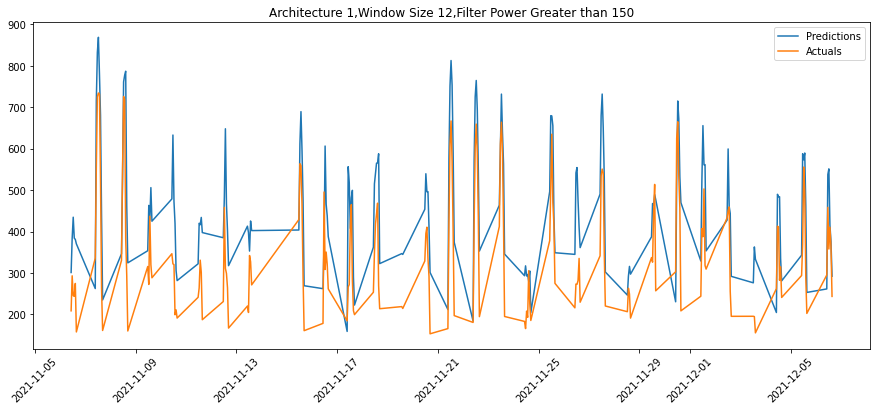

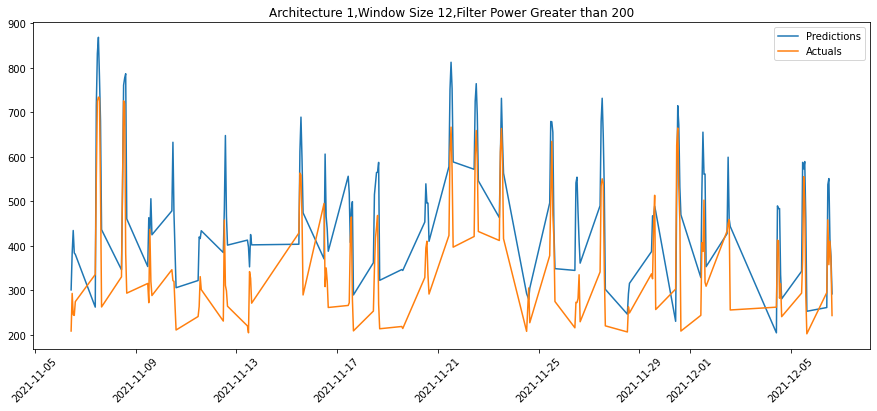

In [18]:
from tensorflow.keras.models import load_model
arc1_12 = load_model('models/arc1_12/')
preds_12=make_predictions(arc1_12, X_test_12, y_test_12)
preds_12['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

inversed_actual = pv_power.inverse_transform(preds_12['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_12['Predictions'].values.reshape(-1,1)).flatten()
preds_12 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_12['Date']})
preds_12.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_12_150 = preds_12[(preds_12['Predictions'] > 150) & (preds_12['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_12_150['Actuals'], preds_12_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_12_150['Actuals'], preds_12_150['Predictions']))
# print(mean_absolute_percentage_error(preds_12_150['Actuals'], preds_12_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_12_150['Actuals'], preds_12_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_12_150['Actuals'], preds_12_150['Predictions'])/(max(preds_12_150['Predictions']-min(preds_12_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_12_150['Predictions'],label='Predictions')
plt.plot(preds_12_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 12,Filter Power Greater than 150")
preds_12.to_excel('preds_12_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_12_200 = preds_12[(preds_12['Predictions'] > 200) & (preds_12['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_12_200['Actuals'], preds_12_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_12_200['Actuals'], preds_12_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_12_200['Actuals'], preds_12_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_12_200['Actuals'], preds_12_200['Predictions'])/(max(preds_12_200['Predictions']-min(preds_12_200['Predictions'])))))

plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_12_200['Predictions'],label='Predictions')
plt.plot(preds_12_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 12,Filter Power Greater than 200")


### Predictions for window size 24

Power Greater than 150
Mean Absolute Error Percentage:- 0.2527449652067949
Root mean squared Error:- 3.9331243612728928
Power Greater than 200
Mean Absolute Error Percentage:- 0.24108180350011185
Root mean squared Error:- 4.297990561183676


Text(0.5, 1.0, 'Architecture 1,Window Size 24,Filter Power Greater than 200')

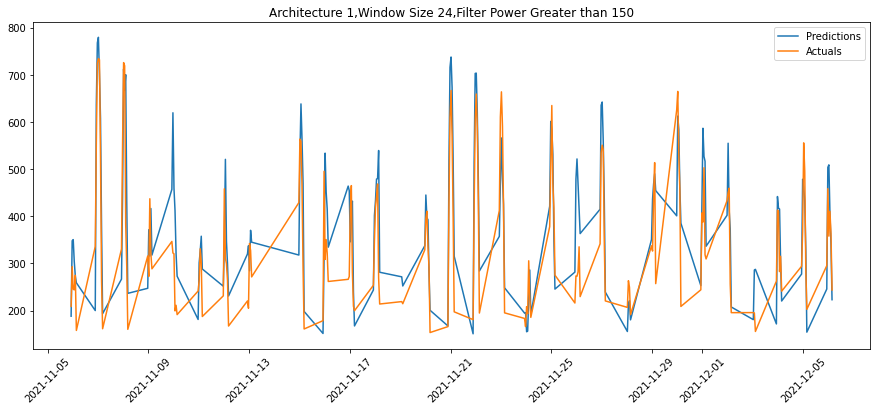

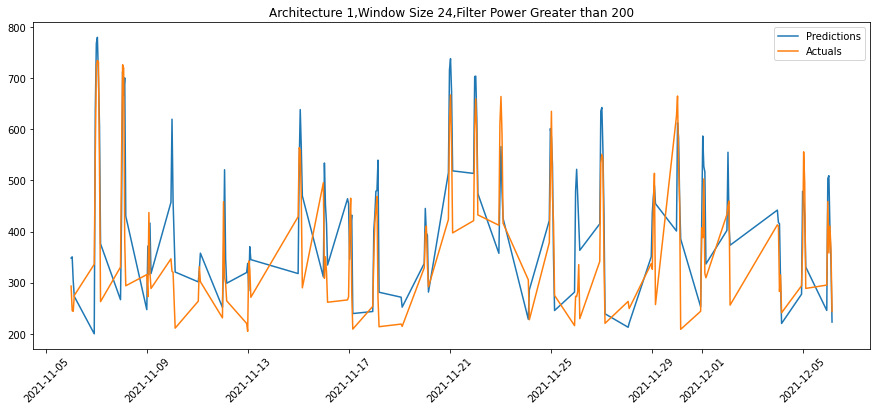

In [19]:
from tensorflow.keras.models import load_model
arc1_24 = load_model('models/arc1_24/')
preds_24=make_predictions(arc1_24, X_test_24, y_test_24)
preds_24['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_24['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_24['Predictions'].values.reshape(-1,1)).flatten()
preds_24 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_24['Date']})
preds_24.set_index('Date', inplace=True)

# Filter fot power greater than 150
print("Power Greater than 150")
preds_24_150 = preds_24[(preds_24['Predictions'] > 150) & (preds_24['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
# print(mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'])/(max(preds_24_150['Predictions']-min(preds_24_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_150['Predictions'],label='Predictions')
plt.plot(preds_24_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 24,Filter Power Greater than 150")
preds_24.to_excel('preds_24_arc1.xlsx')


# Filter fot power greater than 200
print("Power Greater than 200")
preds_24_200 = preds_24[(preds_24['Predictions'] > 200) & (preds_24['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
# print(mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'])/(max(preds_24_200['Predictions']-min(preds_24_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_200['Predictions'],label='Predictions')
plt.plot(preds_24_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 24,Filter Power Greater than 200")


### Predictions for window size 72

Power Greater than 150
Mean Absolute Error Percentage:- 0.19994107289010377
Root mean squared Error:- 3.650388127103339
Power Greater than 200
Mean Absolute Error Percentage:- 0.19939513703186543
Root mean squared Error:- 4.094292998536117


Text(0.5, 1.0, 'Architecture 1,Window Size 72,Filter Power Greater than 200')

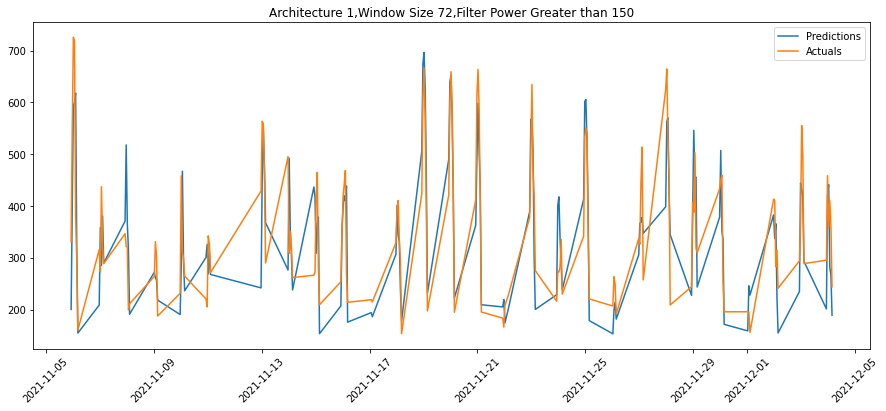

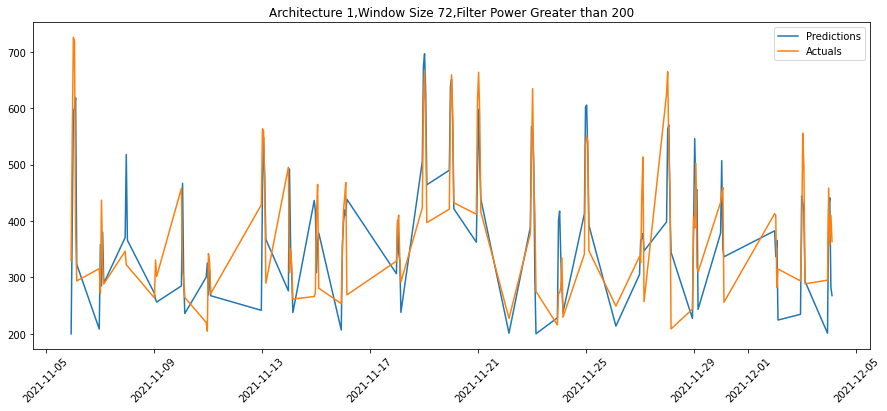

In [20]:
from tensorflow.keras.models import load_model
arc1_72 = load_model('models/arc1_72/')

preds_72=make_predictions(arc1_72, X_test_72, y_test_72)
preds_72['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_72['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_72['Predictions'].values.reshape(-1,1)).flatten()
preds_72 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_72['Date']})
preds_72.set_index('Date', inplace=True)

# Filter for power greater than 150
print("Power Greater than 150")
preds_72_150 = preds_72[(preds_72['Predictions'] > 150) & (preds_72['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_72_150['Actuals'], preds_72_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_72_150['Actuals'], preds_72_150['Predictions']))
# print(mean_absolute_percentage_error(preds_72_150['Actuals'], preds_72_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_72_150['Actuals'], preds_72_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_72_150['Actuals'], preds_72_150['Predictions'])/(max(preds_72_150['Predictions']-min(preds_72_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_72_150['Predictions'],label='Predictions')
plt.plot(preds_72_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 72,Filter Power Greater than 150")

preds_72.to_excel('preds_72_arc1.xlsx')


print("Power Greater than 200")
preds_72_200 = preds_72[(preds_72['Predictions'] > 200) & (preds_72['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_72_200['Actuals'], preds_72_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_72_200['Actuals'], preds_72_200['Predictions']))
# print(mean_absolute_percentage_error(preds_72_200['Actuals'], preds_72_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_72_200['Actuals'], preds_72_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_72_200['Actuals'], preds_72_200['Predictions'])/(max(preds_72_200['Predictions']-min(preds_72_200['Predictions'])))))





plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_72_200['Predictions'],label='Predictions')
plt.plot(preds_72_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 72,Filter Power Greater than 200")



### Predictions for window size 120

Power Greater than 150
Mean Absolute Error Percentage:- 0.19913225477758642
Root mean squared Error:- 3.88629235048122
Power Greater than 200
Mean Absolute Error Percentage:- 0.18465754266442844
Root mean squared Error:- 4.257067285984767


Text(0.5, 1.0, 'Architecture 1,Window Size 120,Filter Power Greater than 200')

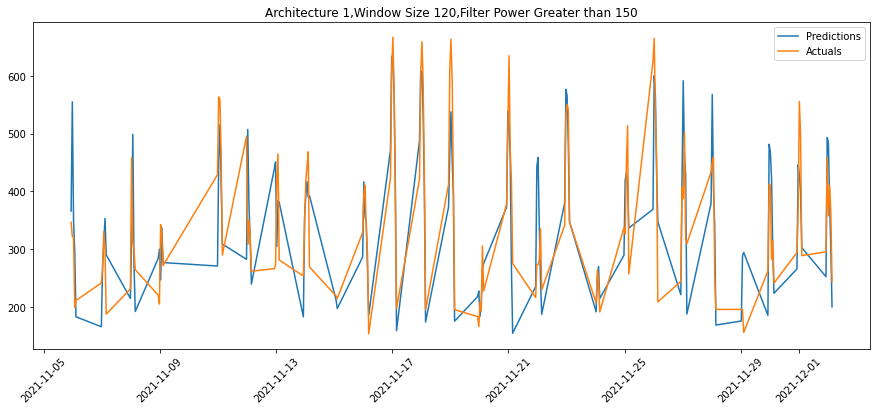

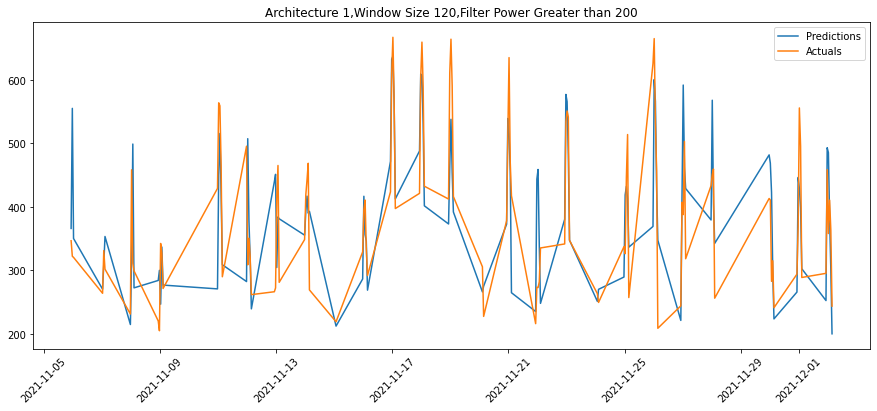

In [21]:
from tensorflow.keras.models import load_model
arc1_120 = load_model('models/arc1_120/')

preds_120=make_predictions(arc1_120, X_test_120, y_test_120)
preds_120['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_120['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_120['Predictions'].values.reshape(-1,1)).flatten()
preds_120 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_120['Date']})
preds_120.set_index('Date', inplace=True)

# Filter for power greater than 150
print("Power Greater than 150")
preds_120_150 = preds_120[(preds_120['Predictions'] > 150) & (preds_120['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
# print(mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
# print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'])/(max(preds_120_150['Predictions']-min(preds_120_150['Predictions'])))))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'])/(max(preds_120_150['Predictions']-min(preds_120_150['Predictions'])))))





plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_150['Predictions'],label='Predictions')
plt.plot(preds_120_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 120,Filter Power Greater than 150")
preds_120.to_excel('preds_120_arc1.xlsx')


# Filter for power greater than 200
print("Power Greater than 200")
preds_120_200 = preds_120[(preds_120['Predictions'] > 200) & (preds_120['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
# print(mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'])/(max(preds_120_200['Predictions']-min(preds_120_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_200['Predictions'],label='Predictions')
plt.plot(preds_120_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 120,Filter Power Greater than 200")


# Architecture 2: Bidirectional LSTM

### Window size 12


In [ ]:
arch2_12 = Sequential()
arch2_12.add(InputLayer((12, 13)))
arch2_12.add(Bidirectional(LSTM(64, activation='relu')))
arch2_12.add(Dense(8, 'relu'))
arch2_12.add(Dense(1, 'linear'))
arch2_12.summary()
arch2_12.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arch2_12.fit(X_train_12, y_train_12, epochs=20,batch_size=32)
arch2_12.save('models/arch2_12/')

### Window size 24

In [ ]:
arch2_24 = Sequential()
arch2_24.add(InputLayer((24, 13)))
arch2_24.add(Bidirectional(LSTM(64, activation='relu')))
arch2_24.add(Dense(8, 'relu'))
arch2_24.add(Dense(1, 'linear'))
arch2_24.summary()
arch2_24.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arch2_24.fit(X_train_24, y_train_24, epochs=20,batch_size=32)
arch2_24.save('models/arch2_24/')

### Window size 72

In [ ]:
arch2_72 = Sequential()
arch2_72.add(InputLayer((72, 13)))
arch2_72.add(Bidirectional(LSTM(64, activation='relu')))
arch2_72.add(Dense(8, 'relu'))
arch2_72.add(Dense(1, 'linear'))
arch2_72.summary()
arch2_72.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arch2_72.fit(X_train_72, y_train_72, epochs=20,batch_size=32)
arch2_72.save('models/arch2_72/')

### Window size 120

In [ ]:
arch2_120 = Sequential()
arch2_120.add(InputLayer((120, 13)))
arch2_120.add(Bidirectional(LSTM(64, activation='relu')))
arch2_120.add(Dense(8, 'relu'))
arch2_120.add(Dense(1, 'linear'))
arch2_120.summary()
arch2_120.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arch2_120.fit(X_train_120, y_train_120, epochs=20,batch_size=32)
arch2_120.save('models/arch2_120/')

## Prediciton for Architecture 2

### window size 12

Power Greater than 150
Mean Absolute Error Percentage:- 0.22270898614372145
Root mean squared Error:- 4.072015677470807
Power Greater than 200
Mean Absolute Error Percentage:- 0.20895674207928158
Root mean squared Error:- 4.215409332893219


Text(0.5, 1.0, 'Architecture 2,Window Size 12,Filter Power Greater than 200')

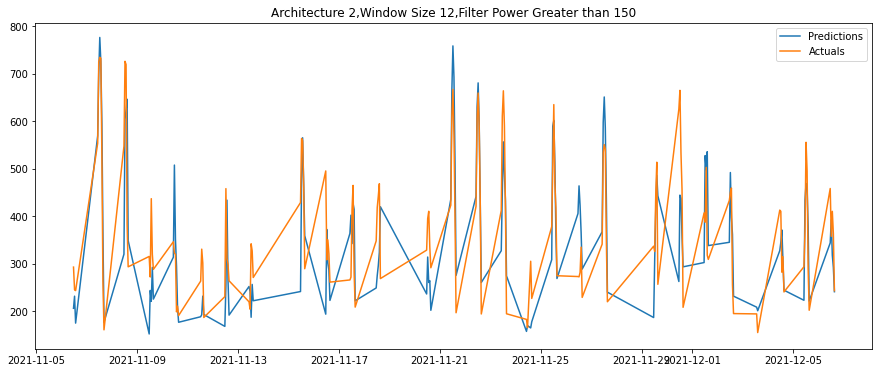

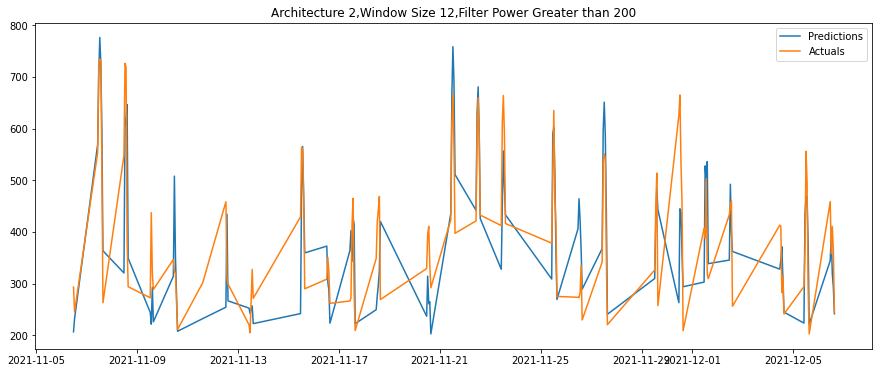

In [26]:
from tensorflow.keras.models import load_model
arch2_12 = load_model('models/arch2_12/')
preds_12=make_predictions(arch2_12, X_test_12, y_test_12)
preds_12['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_12['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_12['Predictions'].values.reshape(-1,1)).flatten()
preds_12 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_12['Date']})
preds_12.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_12_150 = preds_12[(preds_12['Predictions'] > 150) & (preds_12['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_12_150['Actuals'], preds_12_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_12_150['Actuals'], preds_12_150['Predictions']))
# print(mean_absolute_percentage_error(preds_12_150['Actuals'], preds_12_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_12_150['Actuals'], preds_12_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_12_150['Actuals'], preds_12_150['Predictions'])/(max(preds_12_150['Predictions']-min(preds_12_150['Predictions'])))))



plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_12_150['Predictions'],label='Predictions')
plt.plot(preds_12_150['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 12,Filter Power Greater than 150")

preds_12.to_excel('preds_12_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_12_200 = preds_12[(preds_12['Predictions'] > 200) & (preds_12['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_12_200['Actuals'], preds_12_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_12_200['Actuals'], preds_12_200['Predictions']))
# print(mean_absolute_percentage_error(preds_12_200['Actuals'], preds_12_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_12_200['Actuals'], preds_12_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_12_200['Actuals'], preds_12_200['Predictions'])/(max(preds_12_200['Predictions']-min(preds_12_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_12_200['Predictions'],label='Predictions')
plt.plot(preds_12_200['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 12,Filter Power Greater than 200")



### Window size 24

Power Greater than 150
Mean Absolute Error Percentage:- 0.2026551878879788
Root mean squared Error:- 3.6602683543103383
Power Greater than 200
Mean Absolute Error Percentage:- 0.1978489677624391
Root mean squared Error:- 4.127542526211482


Text(0.5, 1.0, 'Architecture 2,Window Size 24,Filter Power Greater than 200')

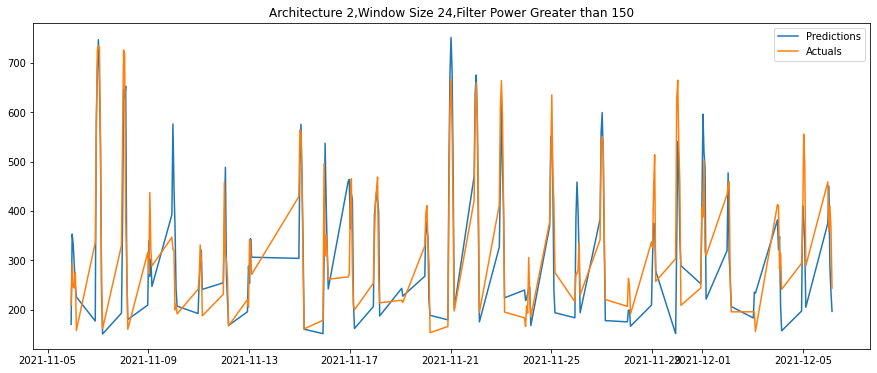

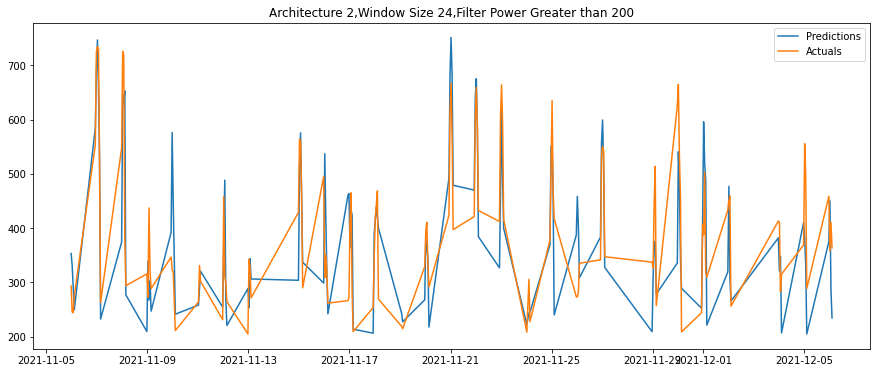

In [27]:
from tensorflow.keras.models import load_model
arch2_24 = load_model('models/arch2_24/')
preds_24=make_predictions(arch2_24, X_test_24, y_test_24)
preds_24['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_24['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_24['Predictions'].values.reshape(-1,1)).flatten()
preds_24 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_24['Date']})
preds_24.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_24_150 = preds_24[(preds_24['Predictions'] > 150) & (preds_24['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
# print(mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'])/(max(preds_24_150['Predictions']-min(preds_24_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_150['Predictions'],label='Predictions')
plt.plot(preds_24_150['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 24,Filter Power Greater than 150")

preds_24.to_excel('preds_24_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_24_200 = preds_24[(preds_24['Predictions'] > 200) & (preds_24['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
# print(mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'])/(max(preds_24_200['Predictions']-min(preds_24_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_200['Predictions'],label='Predictions')
plt.plot(preds_24_200['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 24,Filter Power Greater than 200")


### window size 72

Power Greater than 150
Mean Absolute Error Percentage:- 0.22868440000969445
Root mean squared Error:- 4.197747226555035
Power Greater than 200
Mean Absolute Error Percentage:- 0.21582856729464023
Root mean squared Error:- 4.529858539824411


Text(0.5, 1.0, 'Architecture 2,Window Size 72,Filter Power Greater than 200')

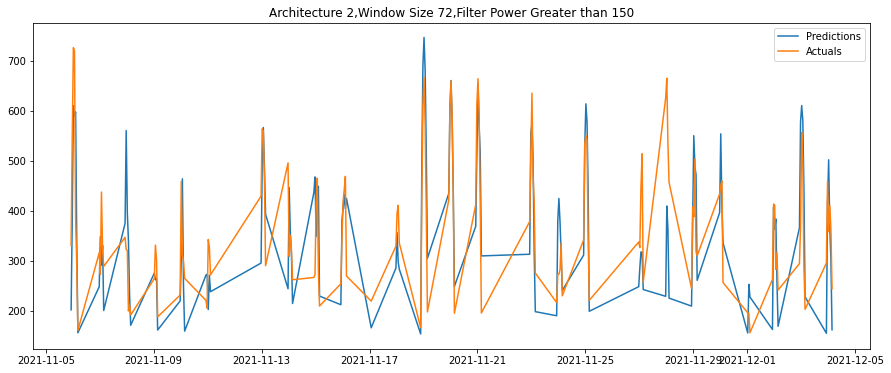

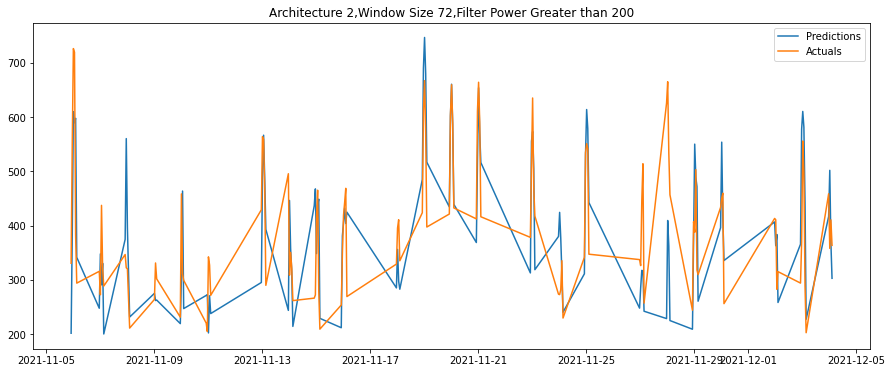

In [28]:
from tensorflow.keras.models import load_model
arch2_72 = load_model('models/arch2_72/')
preds_72=make_predictions(arch2_72, X_test_72, y_test_72)
preds_72['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_72['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_72['Predictions'].values.reshape(-1,1)).flatten()
preds_72 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_72['Date']})
preds_72.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_72_150 = preds_72[(preds_72['Predictions'] > 150) & (preds_72['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_72_150['Actuals'], preds_72_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_72_150['Actuals'], preds_72_150['Predictions']))
# print(mean_absolute_percentage_error(preds_72_150['Actuals'], preds_72_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_72_150['Actuals'], preds_72_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_72_150['Actuals'], preds_72_150['Predictions'])/(max(preds_72_150['Predictions']-min(preds_72_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_72_150['Predictions'],label='Predictions')
plt.plot(preds_72_150['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 72,Filter Power Greater than 150")

preds_72.to_excel('preds_72_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_72_200 = preds_72[(preds_72['Predictions'] > 200) & (preds_72['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_72_200['Actuals'], preds_72_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_72_200['Actuals'], preds_72_200['Predictions']))
# print(mean_absolute_percentage_error(preds_72_200['Actuals'], preds_72_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_72_200['Actuals'], preds_72_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_72_200['Actuals'], preds_72_200['Predictions'])/(max(preds_72_200['Predictions']-min(preds_72_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_72_200['Predictions'],label='Predictions')
plt.plot(preds_72_200['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 72,Filter Power Greater than 200")



### window size 120

Power Greater than 150
Mean Absolute Error Percentage:- 0.3181864028908216
Root mean squared Error:- 5.197163626301528
Power Greater than 200
Mean Absolute Error Percentage:- 0.2789562076165078
Root mean squared Error:- 5.339362036734195


Text(0.5, 1.0, 'Architecture 2,Window Size 120,Filter Power Greater than 200')

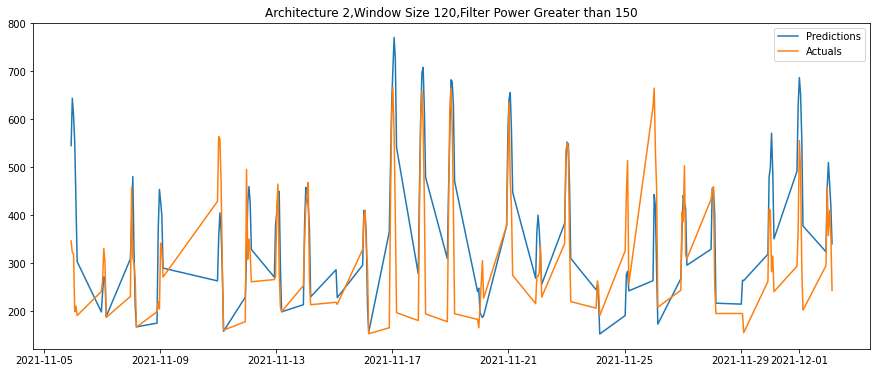

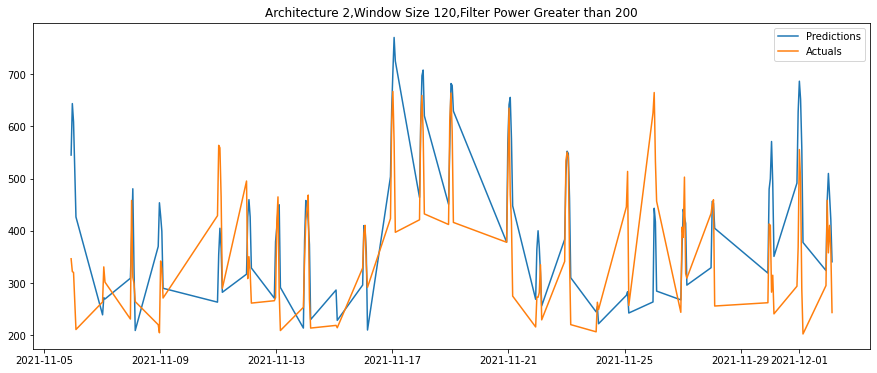

In [29]:
from tensorflow.keras.models import load_model
arch2_120 = load_model('models/arch2_120/')

preds_120=make_predictions(arch2_120, X_test_120, y_test_120)
preds_120['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_120['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_120['Predictions'].values.reshape(-1,1)).flatten()
preds_120 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_120['Date']})
preds_120.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_120_150 = preds_120[(preds_120['Predictions'] > 150) & (preds_120['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
# print(mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'])/(max(preds_120_150['Predictions']-min(preds_120_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_150['Predictions'],label='Predictions')
plt.plot(preds_120_150['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 120,Filter Power Greater than 150")

preds_120.to_excel('preds_120_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_120_200 = preds_120[(preds_120['Predictions'] > 200) & (preds_120['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
# print(mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'])/(max(preds_120_200['Predictions']-min(preds_120_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_200['Predictions'],label='Predictions')
plt.plot(preds_120_200['Actuals'],label='Actuals')
plt.legend()
plt.title("Architecture 2,Window Size 120,Filter Power Greater than 200")


### IDENTIFY POTENTIAL CANDIDATES

In [41]:
from sklearn.feature_selection import mutual_info_regression
from skfeature.function.similarity_based import fisher_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

def fishers_score(X,y,features):
    res = dict(zip(features,
                   fisher_score.fisher_score(X, y,)
                   ))
    return sorted(res.items(), key=lambda kv: kv[1])

    
def get_top(feature_dict):
    top_ten = feature_dict[::-1][:6]
    return list(zip(*top_ten))[0]

def random_forest_importance(X,y,features):
    model = RandomForestRegressor()
    model.fit(X,y)
    res = dict(zip(features,model.feature_importances_))
    return sorted(res.items(), key=lambda kv: kv[1])

#### Using Fisher's Score

In [42]:
df = df6[['cloud general','cloud low','cloud medium','cloud high','irradiance west','rain_mm','airtemp','celltemp','voltage','current','Day sin','Day cos','Date',' west PV power']]
X_train = df[['cloud general','cloud low','cloud medium','cloud high','irradiance west','rain_mm','airtemp','celltemp','voltage','current','Day sin','Day cos']]
y_train = df[' west PV power'].values

features = X_train.columns
X_train = X_train.values


fisher = fishers_score(X_train,y_train,features)
print("Potential Candidates Identified By Fisher's Score")
fisher_features = get_top(fisher)
print(get_top(fisher))

Potential Candidates Identified By Fisher's Score
('Day cos', 'Day sin', 'current', 'voltage', 'cloud low', 'celltemp')


### Using Random Forest Importance

In [43]:
print("Potential Candidates Identified By Random Forest Importance")
ri = random_forest_importance(X_train,y_train,features)
print(get_top(ri))
ri_features  = get_top(ri)

Potential Candidates Identified By Random Forest Importance
('current', 'voltage', 'irradiance west', 'airtemp', 'celltemp', 'cloud general')


In [44]:
fisher_data = df[list(fisher_features)]
fisher_data['west PV power'] = df[' west PV power']
fisher_data['Date'] = df['Date']


train_size = int(fisher_data.shape[0]*0.8)
test_size=int((df.shape[0]*0.2)/2)


random_forest_data = df[list(ri_features)]
random_forest_data['west PV power'] = df[' west PV power']
random_forest_data['Date'] = df['Date']

C:\Users\suhru\AppData\Local\Temp/ipykernel_28584/2132810773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fisher_data['west PV power'] = df[' west PV power']
C:\Users\suhru\AppData\Local\Temp/ipykernel_28584/2132810773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fisher_data['Date'] = df['Date']
C:\Users\suhru\AppData\Local\Temp/ipykernel_28584/2132810773.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

# Train test split

In [47]:
train_fisher = fisher_data.loc[:train_size]
test_fisher = fisher_data.loc[train_size+1:]

train_ri = random_forest_data.loc[:train_size]
test_ri = random_forest_data.loc[train_size+1:]

In [48]:
from sklearn.preprocessing import MinMaxScaler
pv_power = MinMaxScaler()
cloud =MinMaxScaler()
irradiance = MinMaxScaler()
rain = MinMaxScaler()
temp = MinMaxScaler()
cv =MinMaxScaler()
day_sin = MinMaxScaler()
day_cos = MinMaxScaler()

# Scaling for Fisher's Score


# Scale Train Data
scaled_power=pv_power.fit_transform(train_fisher['west PV power'].values.reshape(-1,1))
scaled_cloud = cloud.fit_transform(train_fisher[['cloud low']].values)
scaled_temp = temp.fit_transform(train_fisher[['celltemp']].values)
scaled_cv = cv.fit_transform(train_fisher[['voltage','current']].values)
scaled_daysin = day_sin.fit_transform(train_fisher[['Day sin']].values.reshape(-1,1))
scaled_daycos = day_cos.fit_transform(train_fisher[['Day cos']].values.reshape(-1,1))
scaled_train_fisher = np.concatenate((scaled_daycos,scaled_daysin,scaled_cv,scaled_cloud,scaled_temp,scaled_power),axis=1)


# Scale Train Data
scaled_power=pv_power.fit_transform(test_fisher['west PV power'].values.reshape(-1,1))
scaled_cloud = cloud.fit_transform(test_fisher[['cloud low']].values)
scaled_temp = temp.fit_transform(test_fisher[['celltemp']].values)
scaled_cv = cv.fit_transform(test_fisher[['voltage','current']].values)
scaled_daysin = day_sin.fit_transform(test_fisher[['Day sin']].values.reshape(-1,1))
scaled_daycos = day_cos.fit_transform(test_fisher[['Day cos']].values.reshape(-1,1))
scaled_test_fisher = np.concatenate((scaled_daycos,scaled_daysin,scaled_cv,scaled_cloud,scaled_temp,scaled_power),axis=1)


# Scaling for Random Forest Importance


# Scale Train Data
scaled_power=pv_power.fit_transform(train_ri['west PV power'].values.reshape(-1,1))
scaled_cloud = cloud.fit_transform(train_ri[['cloud general']].values)
scaled_irridance = irradiance.fit_transform(train_ri[['irradiance west']].values.reshape(-1,1))
scaled_temp = temp.fit_transform(train_ri[['airtemp','celltemp']].values)
scaled_cv = cv.fit_transform(train_ri[['voltage','current']].values)
scaled_train_ri = np.concatenate((scaled_cloud,scaled_irridance,scaled_temp,scaled_cv,scaled_power),axis=1)


# Scale Train Data
scaled_power=pv_power.fit_transform(test_ri['west PV power'].values.reshape(-1,1))
scaled_cloud = cloud.fit_transform(test_ri[['cloud general']].values)
scaled_irridance = irradiance.fit_transform(test_ri[['irradiance west']].values.reshape(-1,1))
scaled_temp = temp.fit_transform(test_ri[['airtemp','celltemp']].values)
scaled_cv = cv.fit_transform(test_ri[['voltage','current']].values)
scaled_test_ri = np.concatenate((scaled_cloud,scaled_irridance,scaled_temp,scaled_cv,scaled_power),axis=1)



# Create data function for potential candidates

In [49]:
def create_data_candidates(df_as_np, window_size=24):
#   df_as_np = df.to_numpy()
  X = []
  y = []
  # Exclude Label
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][6]
    y.append(label)
  return np.array(X), np.array(y)

# For window size 12

In [50]:
# Fisher's Score
fisher_X_train_12,fisher_y_train_12=create_data_candidates(scaled_train_fisher,12)
fisher_X_test_12,fisher_y_test_12=create_data_candidates(scaled_test_fisher,12)


# Random Forest Importance
ri_X_train_12,ri_y_train_12=create_data_candidates(scaled_train_ri,12)
ri_X_test_12,ri_y_test_12=create_data_candidates(scaled_test_ri,12)


# For window size 24

In [51]:
# Fisher's Score
fisher_X_train_24,fisher_y_train_24=create_data_candidates(scaled_train_fisher,24)
fisher_X_test_24,fisher_y_test_24=create_data_candidates(scaled_test_fisher,24)


# Random Forest Importance
ri_X_train_24,ri_y_train_24=create_data_candidates(scaled_train_ri,24)
ri_X_test_24,ri_y_test_24=create_data_candidates(scaled_test_ri,24)


# For window size 72

In [52]:
# Fisher's Score
fisher_X_train_72,fisher_y_train_72=create_data_candidates(scaled_train_fisher,72)
fisher_X_test_72,fisher_y_test_72=create_data_candidates(scaled_test_fisher,72)


# Random Forest Importance
ri_X_train_72,ri_y_train_72=create_data_candidates(scaled_train_ri,72)
ri_X_test_72,ri_y_test_72=create_data_candidates(scaled_test_ri,72)


# For window size 120

In [53]:
# Fisher's Score
fisher_X_train_120,fisher_y_train_120=create_data_candidates(scaled_train_fisher,120)
fisher_X_test_120,fisher_y_test_120=create_data_candidates(scaled_test_fisher,120)

# Random Forest Importance
ri_X_train_120,ri_y_train_120=create_data_candidates(scaled_train_ri,120)
ri_X_test_120,ri_y_test_120=create_data_candidates(scaled_test_ri,120)


# Architecture 1

# For Fisher's Score

### window size 120 Since the size 120 had the best results for this architecture

In [54]:
arc1_120_fisher = Sequential()
arc1_120_fisher.add(InputLayer((120, 7)))
arc1_120_fisher.add(LSTM(64))
arc1_120_fisher.add(Dense(8, 'relu'))
arc1_120_fisher.add(Dense(1, 'relu'))
arc1_120_fisher.summary()
arc1_120_fisher.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arc1_120_fisher.fit(fisher_X_train_120, fisher_y_train_120, epochs=20,batch_size=32)
arc1_120_fisher.save('models/arc1_120_fisher/')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18432     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,961
Trainable params: 18,961
Non-trainable params: 0
_________________________________________________________________


ri_y_train_120.shape

## For Random Forest Importance

In [55]:
arc1_120_ri = Sequential()
arc1_120_ri.add(InputLayer((120, 7)))
arc1_120_ri.add(LSTM(64))
arc1_120_ri.add(Dense(8, 'relu'))
arc1_120_ri.add(Dense(1, 'relu'))
arc1_120_ri.summary()
arc1_120_ri.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arc1_120_ri.fit(ri_X_train_120, ri_y_train_120, epochs=20,batch_size=32)
arc1_120_ri.save('models/arc1_120_ri/')


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                18432     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,961
Trainable params: 18,961
Non-trainable params: 0
_________________________________________________________________


### Prediction for Architecture 1 with Potential Candidates

# Prediciton Using Fisher's Score Candidates

Power Greater than 150
Mean Absolute Error Percentage:- 0.2772159001342886
Root mean squared Error:- 4.998583496989891
Power Greater than 200
Mean Absolute Error Percentage:- 0.2396971301574484
Root mean squared Error:- 5.324817020209116


Text(0.5, 1.0, "Architecture 1,Window Size 120,Filter Power Greater than 200,Fisher's Score")

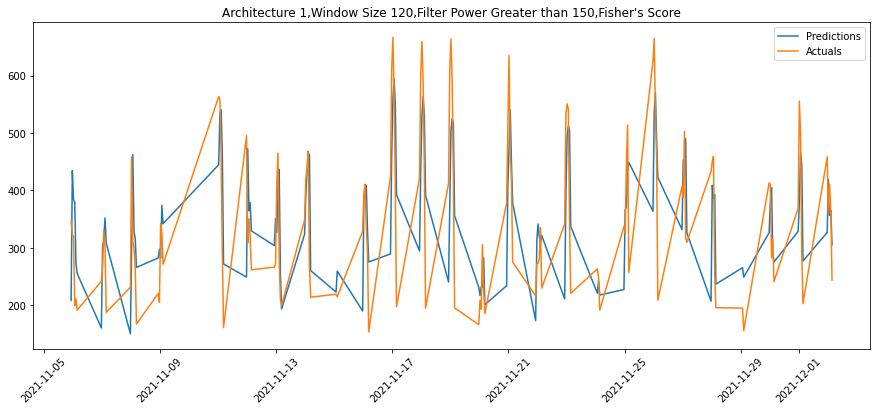

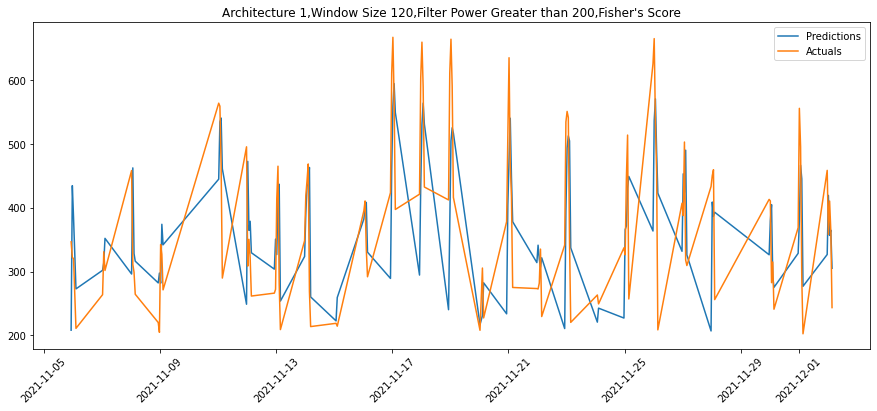

In [61]:
from tensorflow.keras.models import load_model
arc1_120_fisher = load_model('models/arc1_120_fisher/')

preds_120=make_predictions(arc1_120_fisher, fisher_X_test_120, fisher_y_test_120)
preds_120['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_120['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_120['Predictions'].values.reshape(-1,1)).flatten()
preds_120 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_120['Date']})
preds_120.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_120_150 = preds_120[(preds_120['Predictions'] > 150) & (preds_120['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
# print(mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'])/(max(preds_120_150['Predictions']-min(preds_120_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_150['Predictions'],label='Predictions')
plt.plot(preds_120_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 120,Filter Power Greater than 150,Fisher's Score")

preds_120.to_excel('preds_120_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_120_200 = preds_120[(preds_120['Predictions'] > 200) & (preds_120['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
# print(mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'])/(max(preds_120_200['Predictions']-min(preds_120_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_200['Predictions'],label='Predictions')
plt.plot(preds_120_200['Actuals'],label='Actuals')
plt.xticks(rotation=45)
plt.legend()
plt.title("Architecture 1,Window Size 120,Filter Power Greater than 200,Fisher's Score")


# Using Random Forest Importance

Power Greater than 150
Mean Absolute Error Percentage:- 0.2543809809850428
Root mean squared Error:- 5.119307328981186
Power Greater than 200
Mean Absolute Error Percentage:- 0.21727165342862848
Root mean squared Error:- 5.301558725841998


Text(0.5, 1.0, 'Architecture 1,Window Size 120,Filter Power Greater than 200,Random Forest Importance')

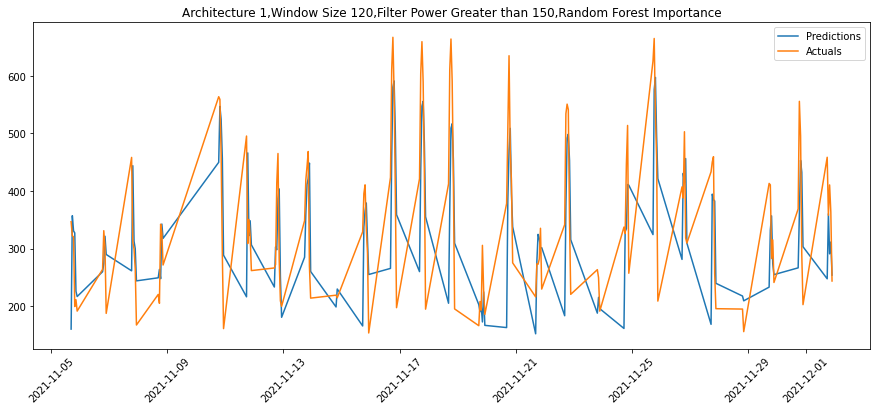

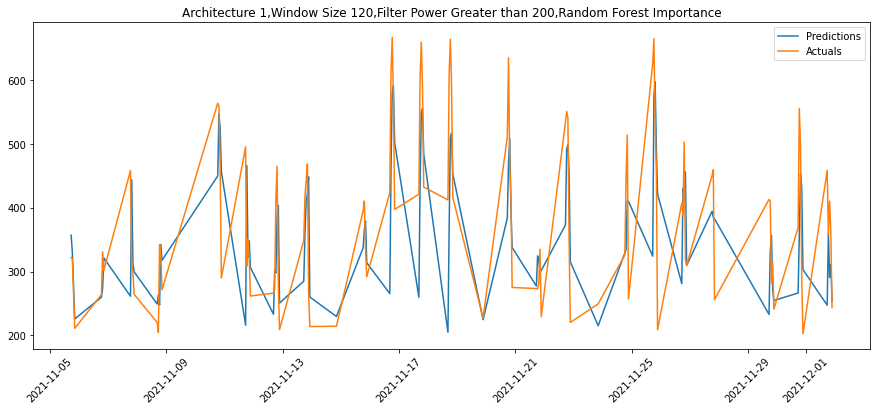

In [62]:
from tensorflow.keras.models import load_model
arc1_120_ri = load_model('models/arc1_120_ri/')

preds_120=make_predictions(arc1_120_ri, ri_X_test_120, ri_y_test_120)
preds_120['Date'] = test['Date'][7:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_120['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_120['Predictions'].values.reshape(-1,1)).flatten()
preds_120 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_120['Date']})
preds_120.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_120_150 = preds_120[(preds_120['Predictions'] > 150) & (preds_120['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
# print(mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_150['Actuals'], preds_120_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_150['Actuals'], preds_120_150['Predictions'])/(max(preds_120_150['Predictions']-min(preds_120_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_150['Predictions'],label='Predictions')
plt.plot(preds_120_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 120,Filter Power Greater than 150,Random Forest Importance")

preds_120.to_excel('preds_120_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_120_200 = preds_120[(preds_120['Predictions'] > 200) & (preds_120['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
# print(mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_120_200['Actuals'], preds_120_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_120_200['Actuals'], preds_120_200['Predictions'])/(max(preds_120_200['Predictions']-min(preds_120_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_120_200['Predictions'],label='Predictions')
plt.plot(preds_120_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 1,Window Size 120,Filter Power Greater than 200,Random Forest Importance")



# Architecture 2
### Window size considered is 24, since it performed better for this architecture

# For Fisher's Score

In [ ]:
arch2_24_fisher = Sequential()
arch2_24_fisher.add(InputLayer((24, 7)))
arch2_24_fisher.add(Bidirectional(LSTM(64, activation='relu')))
arch2_24_fisher.add(Dense(8, 'relu'))
arch2_24_fisher.add(Dense(1, 'linear'))
arch2_24_fisher.summary()
arch2_24_fisher.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arch2_24_fisher.fit(fisher_X_train_24, fisher_y_train_24, epochs=20,batch_size=32)
arch2_24_fisher.save('models/arch2_24_fisher/')

## For Random Forest Importance

In [ ]:
arch2_24_ri = Sequential()
arch2_24_ri.add(InputLayer((24, 7)))
arch2_24_ri.add(Bidirectional(LSTM(64, activation='relu')))
arch2_24_ri.add(Dense(8, 'relu'))
arch2_24_ri.add(Dense(1, 'linear'))
arch2_24_ri.summary()
arch2_24_ri.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError(),MeanAbsolutePercentageError()])
arch2_24_ri.fit(ri_X_train_24, ri_y_train_24, epochs=20,batch_size=32)
arch2_24_ri.save('models/arch2_24_ri/')

# Predictions for Architecture 2

### Fisher's Score

Power Greater than 150
Mean Absolute Error Percentage:- 0.21708754795412524
Root mean squared Error:- 4.383935467236278
Power Greater than 200
Mean Absolute Error Percentage:- 0.20419250665939673
Root mean squared Error:- 4.772447302989821


Text(0.5, 1.0, "Architecture 2,Window Size 24,Filter Power Greater than 200,Fisher's Score")

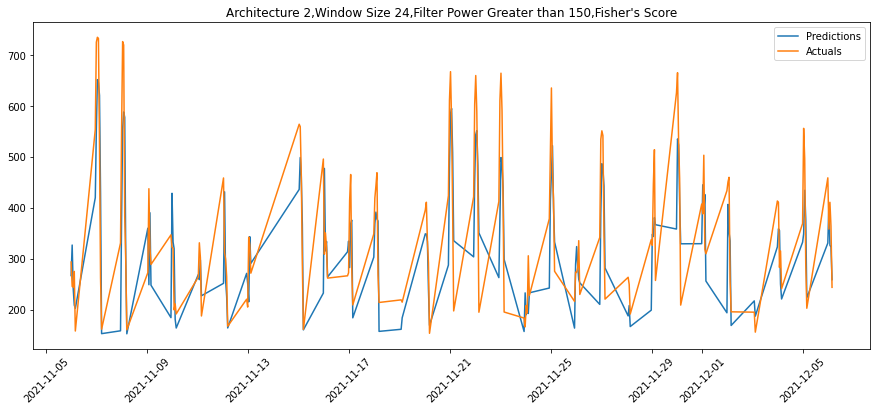

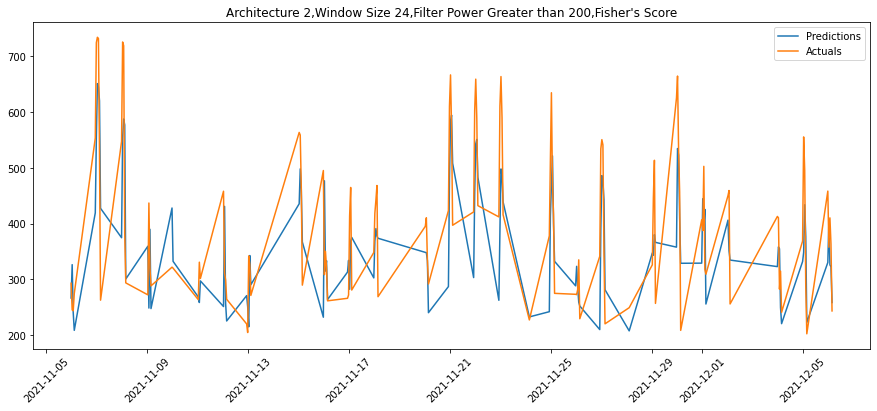

In [63]:
from tensorflow.keras.models import load_model
arch2_24_fisher = load_model('models/arch2_24_fisher/')

preds_24=make_predictions(arch2_24_fisher, fisher_X_test_24, fisher_y_test_24)
preds_24['Date'] = test['Date'][13:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_24['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_24['Predictions'].values.reshape(-1,1)).flatten()
preds_24 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_24['Date']})
preds_24.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_24_150 = preds_24[(preds_24['Predictions'] > 150) & (preds_24['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
# print(mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'])/(max(preds_24_150['Predictions']-min(preds_24_150['Predictions'])))))



plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_150['Predictions'],label='Predictions')
plt.plot(preds_24_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 2,Window Size 24,Filter Power Greater than 150,Fisher's Score")

preds_24.to_excel('preds_24_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_24_200 = preds_24[(preds_24['Predictions'] > 200) & (preds_24['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
# print(mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'])/(max(preds_24_200['Predictions']-min(preds_24_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_200['Predictions'],label='Predictions')
plt.plot(preds_24_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 2,Window Size 24,Filter Power Greater than 200,Fisher's Score")


### Random Forest Importance

Power Greater than 150
Mean Absolute Error Percentage:- 0.23289104115028456
Root mean squared Error:- 4.39991602154979
Power Greater than 200
Mean Absolute Error Percentage:- 0.20434423199670046
Root mean squared Error:- 4.424394929871558


Text(0.5, 1.0, 'Architecture 2,Window Size 24,Filter Power Greater than 200,Random Forest Importance')

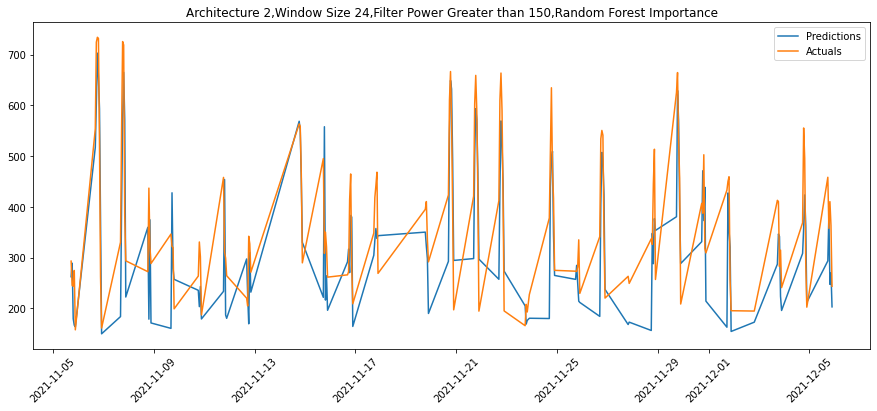

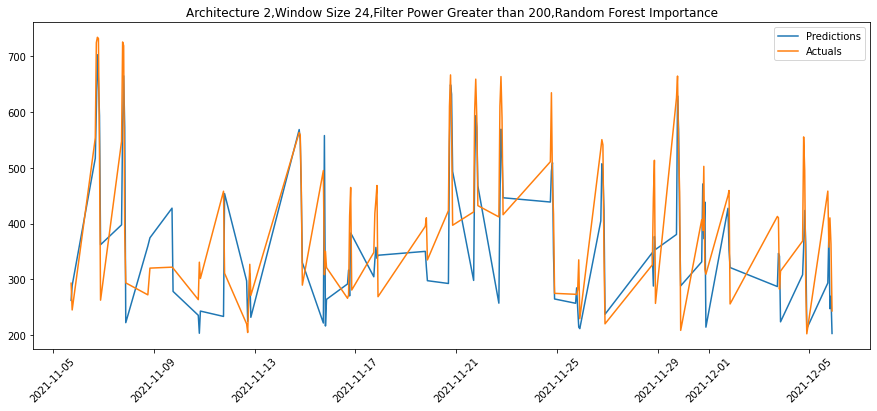

In [64]:
from tensorflow.keras.models import load_model
arch2_24_ri = load_model('models/arch2_24_ri/')

preds_24=make_predictions(arch2_24_ri, ri_X_test_24, ri_y_test_24)
preds_24['Date'] = test['Date'][7:test.shape[0]].reset_index(drop=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

inversed_actual = pv_power.inverse_transform(preds_24['Actuals'].values.reshape(-1,1)).flatten()
inversed_predicted = pv_power.inverse_transform(preds_24['Predictions'].values.reshape(-1,1)).flatten()
preds_24 = pd.DataFrame(data={'Predictions':inversed_predicted, 'Actuals':inversed_actual,'Date':preds_24['Date']})
preds_24.set_index('Date', inplace=True)

print("Power Greater than 150")
# Filter for power greater than 150
preds_24_150 = preds_24[(preds_24['Predictions'] > 150) & (preds_24['Actuals'] > 150)].copy()
# print(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
# print(mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_150['Actuals'], preds_24_150['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_150['Actuals'], preds_24_150['Predictions'])/(max(preds_24_150['Predictions']-min(preds_24_150['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_150['Predictions'],label='Predictions')
plt.plot(preds_24_150['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 2,Window Size 24,Filter Power Greater than 150,Random Forest Importance")
preds_24.to_excel('preds_24_arc1.xlsx')



# Filter for power Greater than 200
print("Power Greater than 200")
preds_24_200 = preds_24[(preds_24['Predictions'] > 200) & (preds_24['Actuals'] > 200)].copy()
# print(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'],squared=False))
# print(mean_absolute_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
# print(mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Mean Absolute Error Percentage:-',mean_absolute_percentage_error(preds_24_200['Actuals'], preds_24_200['Predictions']))
print('Root mean squared Error:-',np.sqrt(mean_squared_error(preds_24_200['Actuals'], preds_24_200['Predictions'])/(max(preds_24_200['Predictions']-min(preds_24_200['Predictions'])))))


plt.figure(figsize=(15,6))
# plt.style('ggplot')
plt.plot(preds_24_200['Predictions'],label='Predictions')
plt.plot(preds_24_200['Actuals'],label='Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.title("Architecture 2,Window Size 24,Filter Power Greater than 200,Random Forest Importance")